# **<center><span style= "color:#2F539B;">Handling missing values</span></center>**

## ***<span style= "color:maroon;">Contents </span>***
- ***`Imports`*** 
- **`Handling missing values with pandas methods`** 
- **`Handling with sk_learn`**
- **`Handling with KKN algo`**

## ***<span style= "color:purple;">Imports </span>***

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer # for multivariate
from sklearn.impute import SimpleImputer,IterativeImputer, KNNImputer # (simpleTmputer)for univarite imputation



## ***<span style= "color:#81D8D0;">Handling with pandas methods </span>***

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
# count null values in each columns 
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
# count total null values in the dataframe
df.isnull().sum().sum()

np.int64(869)

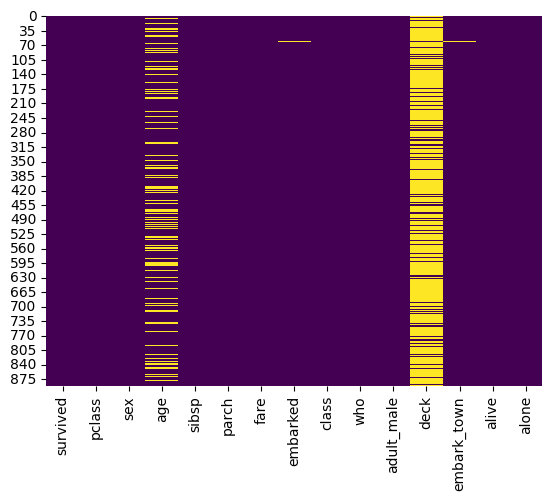

In [20]:
plt.Figure(figsize=(8,5))
sns.heatmap(data=df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [21]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [22]:
# to check in percentage use this formula
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
sex             0.00
pclass          0.00
survived        0.00
fare            0.00
parch           0.00
sibsp           0.00
class           0.00
adult_male      0.00
who             0.00
alive           0.00
alone           0.00
dtype: float64

In [27]:
# use (mean, median, mode)
# numarical variables--> mean, median
# catagorical variables--> mode

#mean of age to fill missing values 
median = df['age'].median()
df['age'] = df['age'].fillna(median)


In [29]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [30]:
# drop the column axis(1) to remove full column
df.drop('deck', axis=1, inplace=True)

In [31]:
df.isnull().sum().sort_values(ascending=False)

embark_town    2
embarked       2
sex            0
age            0
survived       0
pclass         0
parch          0
sibsp          0
class          0
fare           0
who            0
adult_male     0
alive          0
alone          0
dtype: int64

In [36]:
# replacing ebarked missing values with mode (mode use for catagorical data or column)

df['embark_town'].value_counts()

# technique 1
mode = df['embark_town'].mode()[0]
df['embark_town'] = df['embark_town'].fillna(mode)

# technique 2
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [37]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## ***<span style= "color:#66CDAA;">Handling with sk_learn </span>***

In [39]:
# now this time i use data instead df
data = sns.load_dataset('titanic')


In [ ]:
# impute age column using simple imputer from sk_learn

# univariate imputation (impute the column with that same column)
imputer = SimpleImputer(strategy='median') # you can use mean if you want to
data['age'] = imputer.fit_transform(data[['age']])

In [42]:
data.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [56]:
# multivariate imputation
df = sns.load_dataset('titanic')


In [58]:
multi_imputer = IterativeImputer(max_iter=20, n_nearest_features=6)
df['age'] = multi_imputer.fit_transform(df[['age']])



In [50]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [51]:
# forward fill and backward fill
df['age'] = df['age'].ffill()

In [52]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

## ***<span style= "color:#728C00;">Handling with KNN algo </span>***

In [55]:
# using KNN imputer 
knn_imputer = KNNImputer(n_neighbors=5)
df['age'] = knn_imputer.fit_transform(df[['age']])

In [ ]:
# drop missing rows
df.dropna()